# Home Work 2 
## Alejandro Moscoso 332336908
## 

Generate 100 samples from a N(0, 1) distribution. Compute a 95% CI for the CDF. Repeat this 1000 
times and compute the percentage of time
that the interval contained the CDF. In addition plot in a single figure the
true CDF the best and the worst experiment (use maxx|F(x) − Fˆ
n(x)| as
quality measure).

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import seaborn as sb
from pprint import pprint
sb.set_style('whitegrid')
matplotlib.rcParams.update({'font.size': 22,'figure.figsize':[12, 12.0]})
import os
os.getcwd()
hw2_path= r'\Homework\DataAnalisis\Hw2'
samsumn= os.getcwd()+hw2_path+r'\samsungData.csv'
print (samsumn)

D:\Ale\Documents\Technion\DataAnalisis\Homework\DataAnalisis\Hw2\Homework\DataAnalisis\Hw2\samsungData.csv


0.959


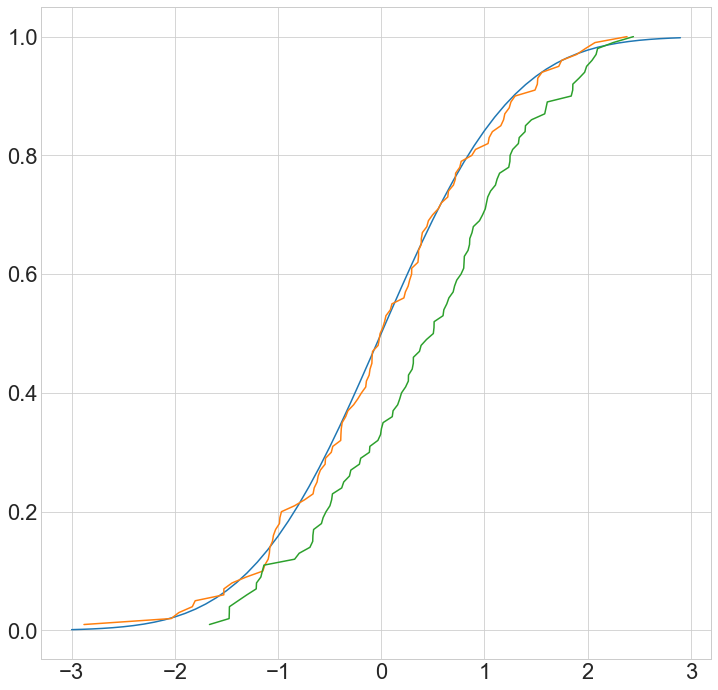

In [42]:

N=100
data = np.random.randn(N)
miu= 0
var = 1/N

def ecdf(data):
    xs= np.sort(data)
    ys=np.arange(1,len(xs)+1)/float(len(xs))
    return xs , ys

def DKW_95(data):
    sample_size = len(data)
    error = np.sqrt((-1)*np.log(0.025)/(2*sample_size))
    return error

def max_cdfdi_diference(data):
    real_cdf=stats.norm.cdf(np.sort(data))
    empiri_cdf = ecdf(data)[1]
    return np.max(np.absolute(real_cdf - empiri_cdf))

def critical_95(data,standar_dev):
    sample_size= len(data)
    z_critical = stats.norm.ppf(q = 0.975)
    margin_of_error = z_critical * (standar_dev/np.sqrt(sample_size))
    sample_mean = np.mean(data)
    return (sample_mean - margin_of_error, sample_mean + margin_of_error)

def question_1(sample_sise, repetitions):
    miu= 0
    var = 1/N
    hit_times =0
    max_error_bigger=0
    best_match=8
    
    data_plot={'real':pd.Series(stats.norm.cdf(np.arange(-3,3,0.1)),np.arange(-3,3,0.1))}
    
    
    for _ in range(repetitions):
        data = np.random.randn(N)
        max_error = DKW_95(data)
        
        real_error = max_cdfdi_diference(data)
        if (max_error>= real_error):
            hit_times += 1
            
        if (max_error_bigger<real_error):
            max_error_bigger=real_error
            data_plot['worst']= pd.Series(ecdf(data))
            
        if (real_error<best_match):
            best_match=real_error
            data_plot['best']=pd.Series( ecdf(data))
    data_plot['hit_rate'] = hit_times/float(repetitions)
    return data_plot
data_plot = question_1(100,1000)
plt.figure()
plt.plot(data_plot['real'])
plt.plot(data_plot['best'][0],data_plot['best'][1])
plt.plot(data_plot['worst'][0],data_plot['worst'][1])
print (data_plot['hit_rate'])
plt.show()

In [43]:
df=pd.read_csv('samsungData.csv')

In [46]:
pprint(df.columns)

Index(['Unnamed: 0', 'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y',
       'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y',
       'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y',
       'tBodyAcc-mad()-Z',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'activity'],
      dtype='object', length=564)


In [33]:
stats.norm.cdf(np.sort(data))

array([ 0.01401481,  0.02744944,  0.0294804 ,  0.03336525,  0.04784451,
        0.05021557,  0.07793022,  0.08703603,  0.09522736,  0.10714628,
        0.17132667,  0.17316978,  0.18332074,  0.1896138 ,  0.200939  ,
        0.20525705,  0.20934812,  0.2247275 ,  0.24926707,  0.24927935,
        0.25607419,  0.26667914,  0.27322857,  0.28226497,  0.28761462,
        0.30302768,  0.30559187,  0.30591571,  0.31109792,  0.3146554 ,
        0.32066081,  0.33699481,  0.34980063,  0.35318643,  0.35732758,
        0.36317436,  0.3645417 ,  0.38480895,  0.39056311,  0.3953925 ,
        0.40143072,  0.41582409,  0.44183395,  0.44968689,  0.48281205,
        0.50488601,  0.51177069,  0.53475157,  0.54061229,  0.54320587,
        0.56184592,  0.57196152,  0.60663159,  0.6095456 ,  0.62054201,
        0.62309842,  0.62487727,  0.65120528,  0.65407651,  0.6693949 ,
        0.67358197,  0.68995285,  0.69970451,  0.70995518,  0.71103207,
        0.73731031,  0.74655555,  0.76033025,  0.77381204,  0.77